# WeatherPy

## Observations

Observation 1: Of the four factors analyzed, the strongest correlation was between northern hemisphere temperature and latitude.

Observation 2: The highest temperatures are found near the equator and decrease as you move towards the polar regions.

Observation 3: Cloudiness does not have a strong correlation to latitude.  

# Imports

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns

#data science
import pandas as pd
import numpy as np

import requests
from pprint import pprint
import time

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_new.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
filepath = "cities_new.csv"
df = pd.read_csv(filepath)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,-53.15,-70.92,46.40,81,90,8.05
1,Bengkulu,-3.80,102.27,75.29,86,100,4.03
2,Severo-Kuril'sk,50.68,156.12,38.79,73,98,31.65
3,Lillooet,50.69,-121.94,50.85,93,90,8.05
4,Tahoua,14.89,5.27,82.40,23,0,4.70


In [3]:
df.shape

(575, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    575 non-null    object 
 1   Latitude     575 non-null    float64
 2   Longitude    575 non-null    float64
 3   Temperature  575 non-null    float64
 4   Humidity     575 non-null    int64  
 5   Cloudiness   575 non-null    int64  
 6   Wind Speed   575 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 31.6+ KB


In [5]:
df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,19.415357,22.192435,58.142922,70.617391,50.986087,8.371339
std,32.760375,91.168693,23.578095,21.159994,39.421025,6.200566
min,-54.800000,-175.200000,-25.400000,1.000000,0.000000,0.160000
25%,-7.225000,-58.145000,45.435000,57.000000,4.000000,4.050000
50%,22.200000,25.570000,65.050000,77.000000,53.000000,6.930000
75%,47.450000,110.285000,76.525000,87.000000,90.000000,11.055000
max,78.220000,178.420000,96.170000,100.000000,100.000000,36.910000


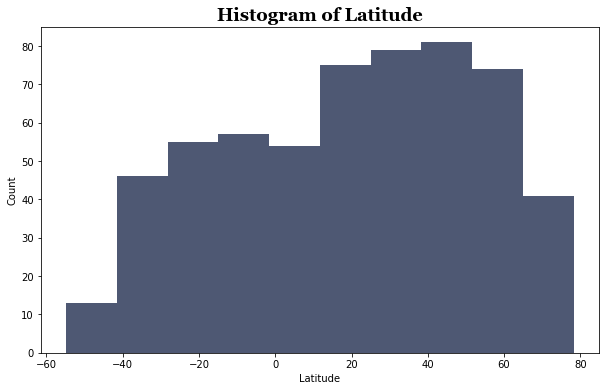

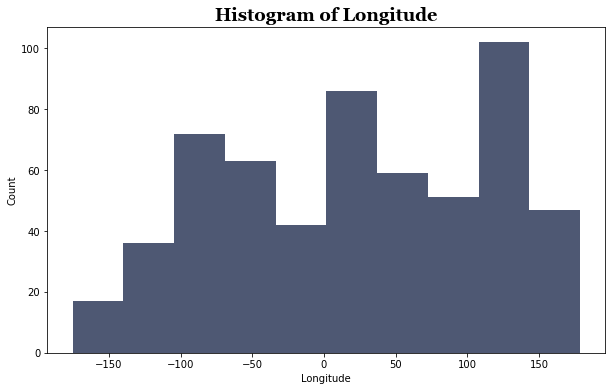

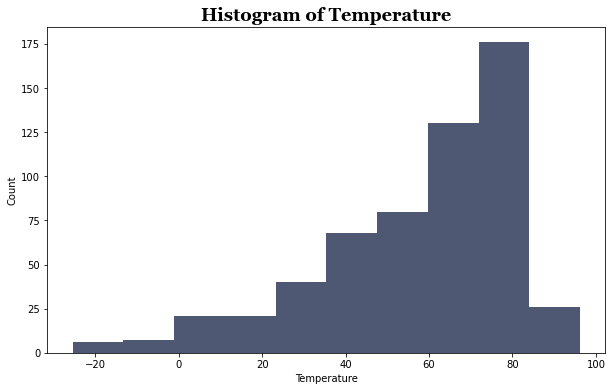

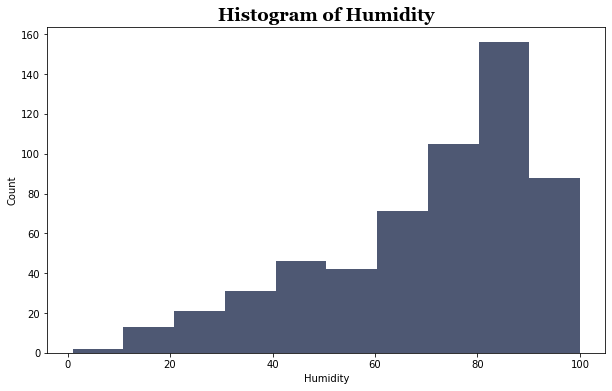

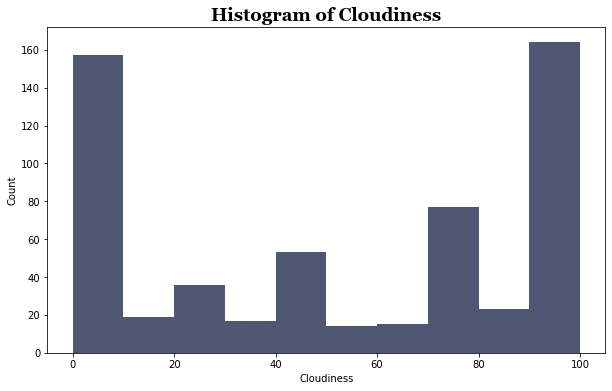

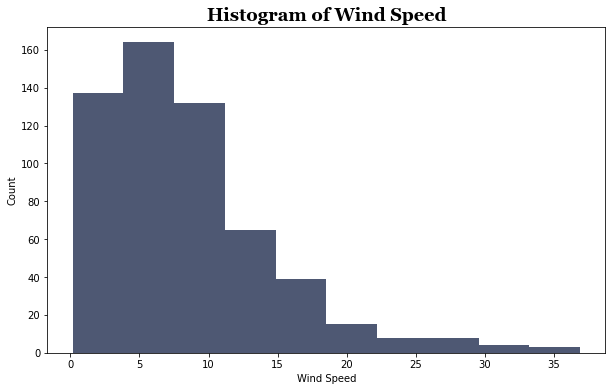

In [6]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        plt.hist(df[col], color = "#222E50", alpha=0.8)
        plt.title(f"Histogram of {col}", fontsize=18, fontweight="bold", fontname = "Georgia")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

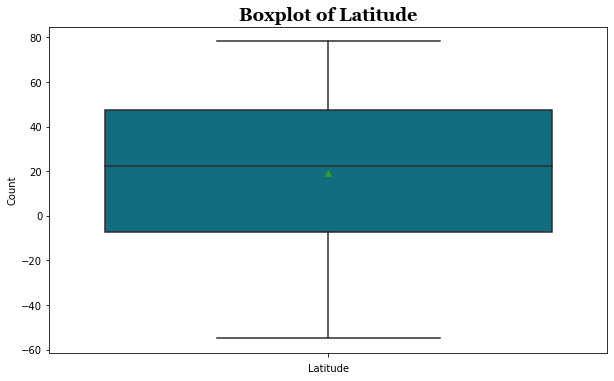

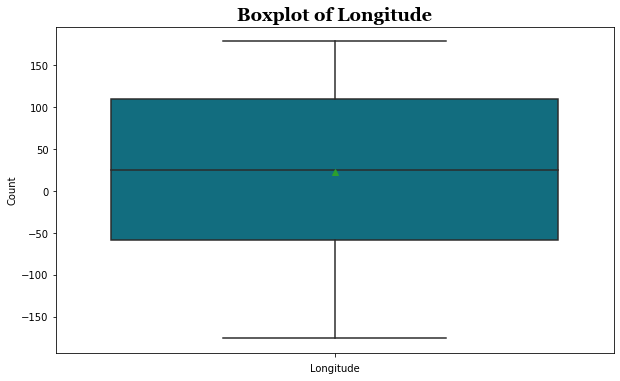

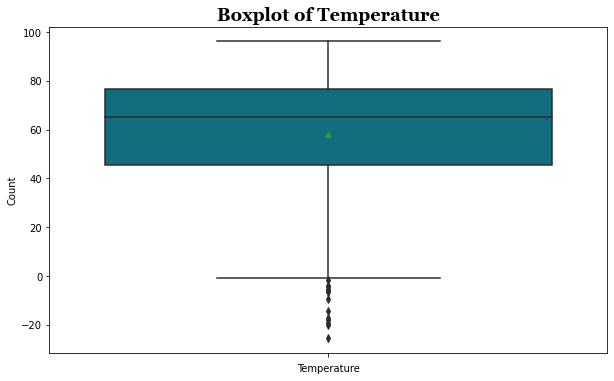

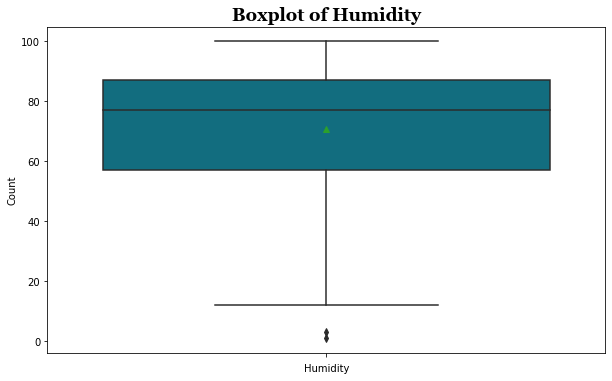

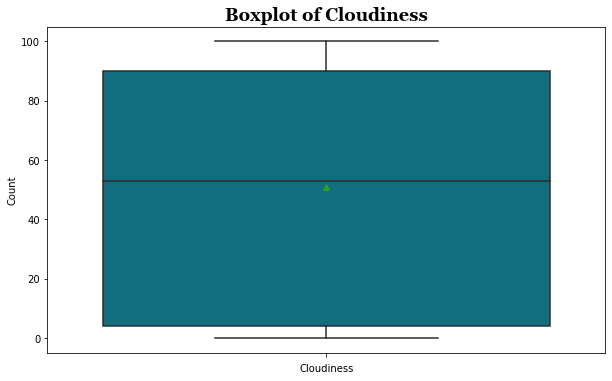

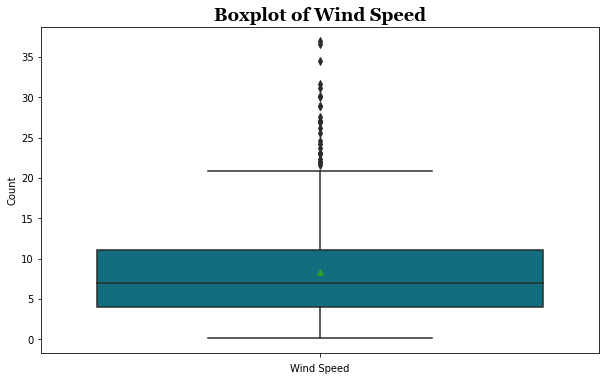

In [7]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.boxplot(y=col, data=df, showmeans="True", color = "#007991")
        plt.title(f"Boxplot of {col}", fontsize=18, fontweight="bold", fontname = "Georgia")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

In [8]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere_NS,Hemisphere_WE
0,Punta Arenas,-53.15,-70.92,46.40,81,90,8.05,Southern,Western
1,Bengkulu,-3.80,102.27,75.29,86,100,4.03,Southern,Eastern
2,Severo-Kuril'sk,50.68,156.12,38.79,73,98,31.65,Northern,Eastern
3,Lillooet,50.69,-121.94,50.85,93,90,8.05,Northern,Western
4,Tahoua,14.89,5.27,82.40,23,0,4.70,Northern,Eastern


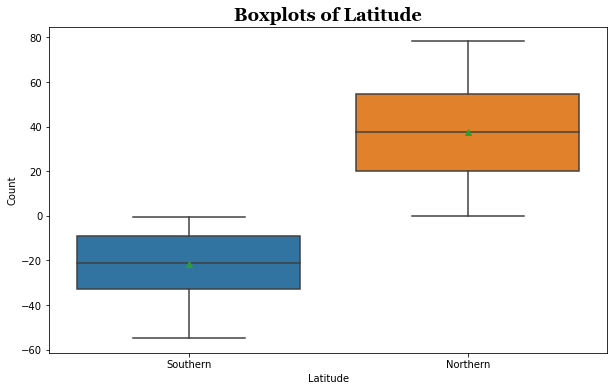

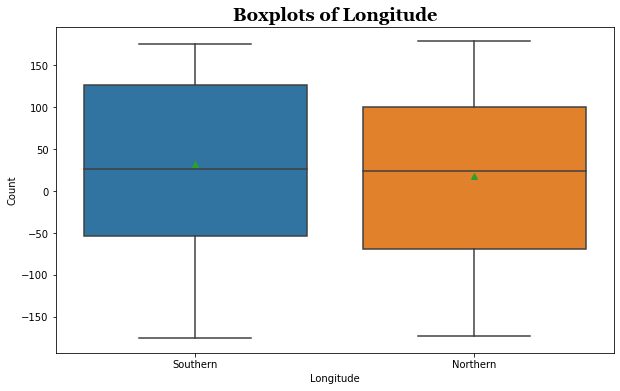

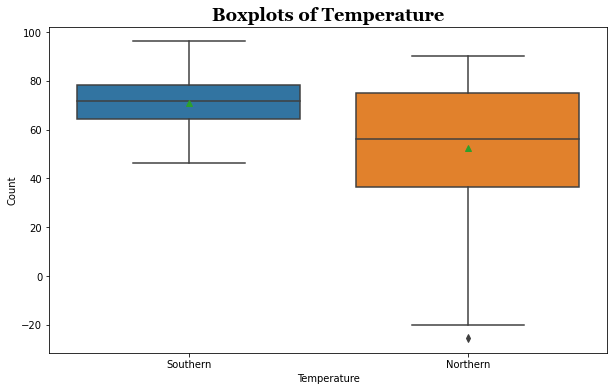

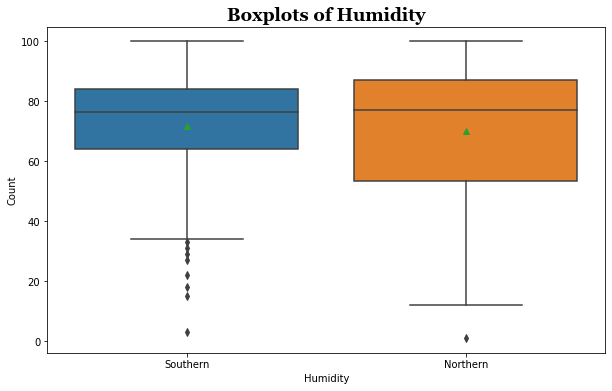

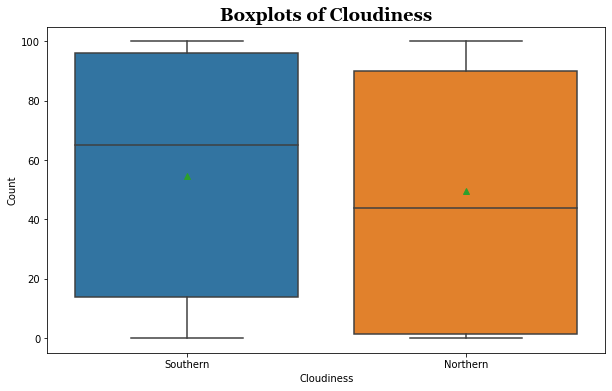

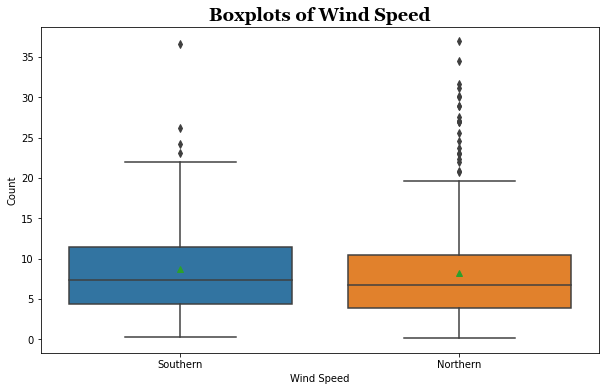

In [9]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.boxplot(x="Hemisphere_NS", y=col, data=df, showmeans="True")
        plt.title(f"Boxplots of {col}", fontsize=18, fontweight="bold", fontname = "Georgia")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

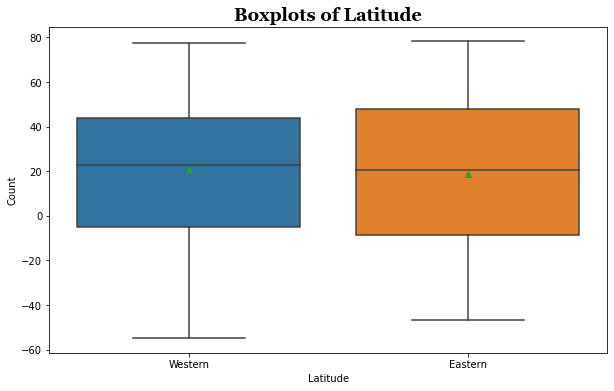

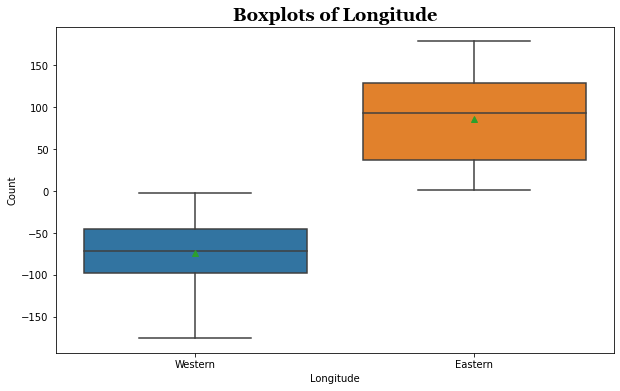

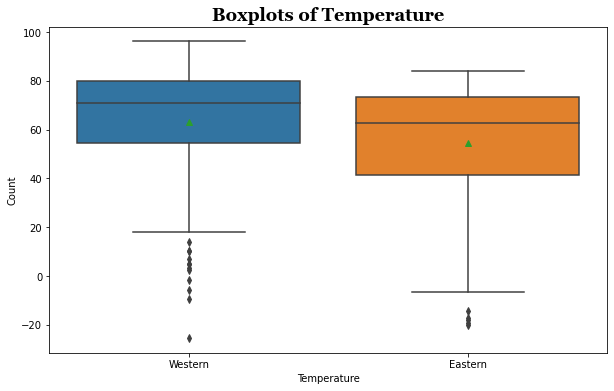

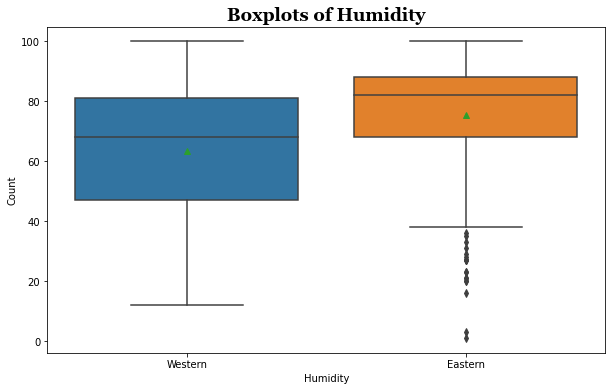

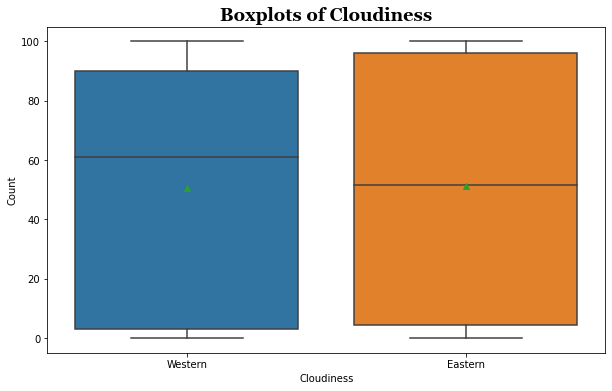

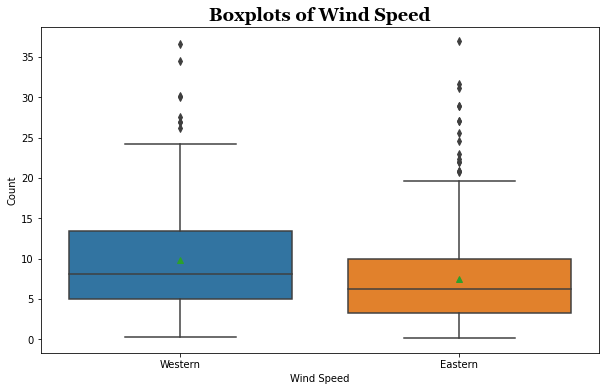

In [10]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.boxplot(x="Hemisphere_WE", y=col, data=df, showmeans="True")
        plt.title(f"Boxplots of {col}", fontsize=18, fontweight="bold", fontname = "Georgia")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

# Scatter Plots

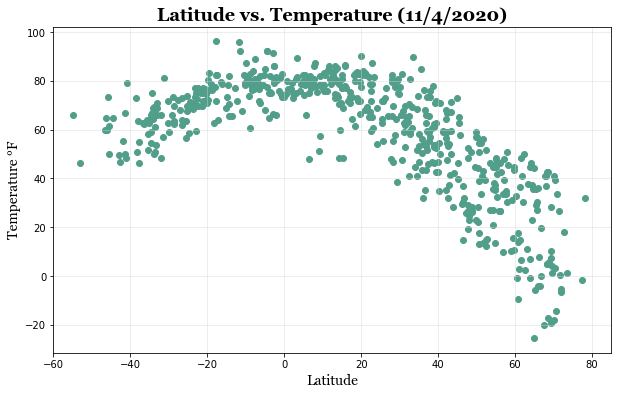

In [11]:
#Figsize
plt.figure(figsize=(10,6))

#Raw plot
plt.scatter(df["Latitude"], df["Temperature"], color = "#519E8A")

#Title and labels
plt.title("Latitude vs. Temperature (11/4/2020)", fontsize=18, fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude", fontsize=14, fontname = "Georgia")
plt.ylabel("Temperature °F", fontsize=14, fontname = "Georgia")
plt.grid(color="lightgrey", alpha =0.5)

plt.xlim(-60,85)

#save
plt.savefig("Images/Latitude_v_Temperature.png")

#Show
plt.show()

The highest temperatures are clustered near the equator and temperature decreases as latitude increases or decreases.

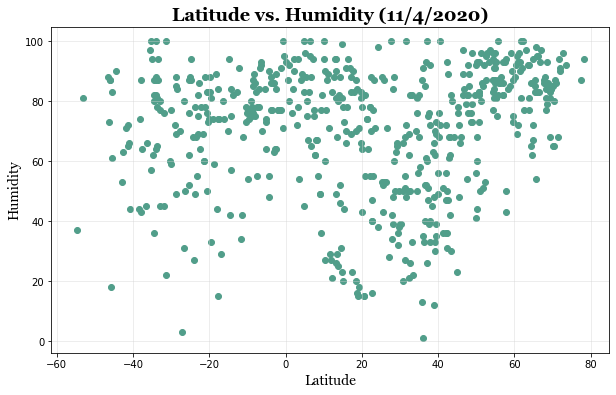

In [12]:
#Figsize
plt.figure(figsize=(10,6))

#Raw plot
plt.scatter(df["Latitude"], df["Humidity"], color = "#519E8A")

#Title and labels
plt.title("Latitude vs. Humidity (11/4/2020)", fontsize=18, fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude", fontsize=14, fontname = "Georgia")
plt.ylabel("Humidity", fontsize=14, fontname = "Georgia")
plt.grid(color="lightgrey", alpha =0.5)

#save
plt.savefig("Images/Latitude_v_Humidity.png")

#Show
plt.show()

Humidity is more dispersed in the regions and clustered more moving towards the equator.

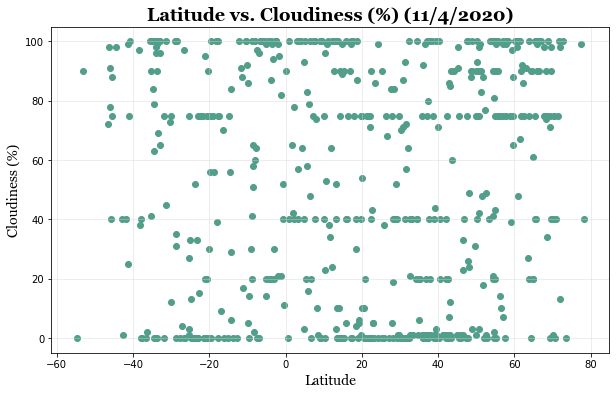

In [13]:
#Figsize
plt.figure(figsize=(10,6))

#Raw plot
plt.scatter(df["Latitude"], df["Cloudiness"], color = "#519E8A")

#Title and labels
plt.title("Latitude vs. Cloudiness (%) (11/4/2020)", fontsize=18, fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude", fontsize=14, fontname = "Georgia")
plt.ylabel("Cloudiness (%)", fontsize=14, fontname = "Georgia")
plt.grid(color="lightgrey", alpha =0.5)

#save
plt.savefig("Images/Latitude_v_Cloudiness.png")

#Show
plt.show()

Cloudiness is dispersed and widespread across latitude.

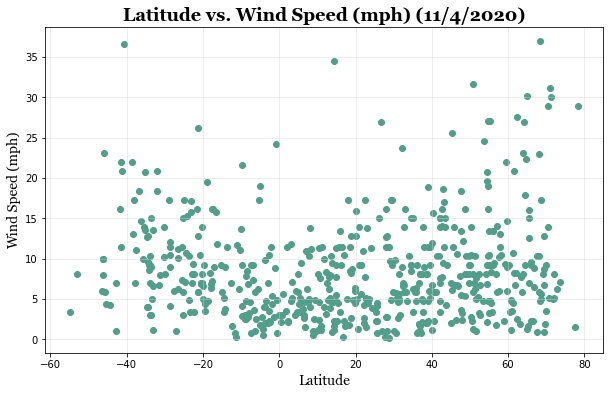

In [14]:
#Figsize
plt.figure(figsize=(10,6))

#Raw plot
plt.scatter(df["Latitude"], df["Wind Speed"], color = "#519E8A")

#Title and labels
plt.title("Latitude vs. Wind Speed (mph) (11/4/2020)", fontsize=18, fontweight="bold", fontname = "Georgia")
plt.xlabel("Latitude", fontsize=14, fontname = "Georgia")
plt.ylabel("Wind Speed (mph)", fontsize=14, fontname = "Georgia")
plt.grid(color="lightgrey", alpha =0.5)

#save
plt.savefig("Images/Latitude_v_Wind_Speed.png")

#Show
plt.show()

Windspeeds vary but are dispersed across all latitudes.

# Linear Regression

In [15]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
Latitude,1.000000,-0.087422,-0.646437,0.104898,0.021026,0.047154
Longitude,-0.087422,1.000000,-0.190355,0.313566,0.034757,-0.182371
Temperature,-0.646437,-0.190355,1.000000,-0.344507,-0.109025,-0.035675
Humidity,0.104898,0.313566,-0.344507,1.000000,0.437802,0.015341
Cloudiness,0.021026,0.034757,-0.109025,0.437802,1.000000,0.055139
Wind Speed,0.047154,-0.182371,-0.035675,0.015341,0.055139,1.000000


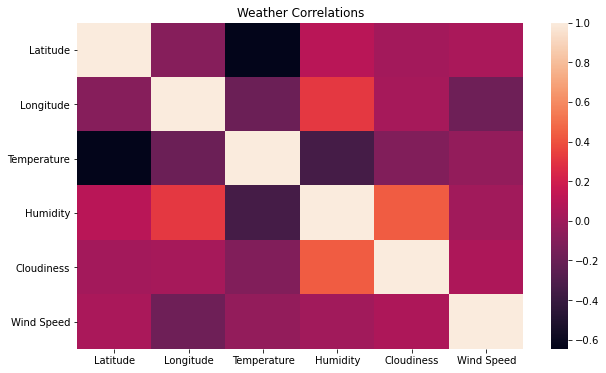

In [16]:
plt.figure(figsize=(10,6))

sns.heatmap(corrs)

plt.title("Weather Correlations")
plt.show()

In [17]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()
corrs2

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
Latitude,1.000000,-0.024823,-0.833464,0.266811,0.157741,0.275471
Longitude,-0.024823,1.000000,-0.255695,0.325389,0.031063,-0.136376
Temperature,-0.833464,-0.255695,1.000000,-0.425323,-0.189930,-0.035033
Humidity,0.266811,0.325389,-0.425323,1.000000,0.482946,0.055241
Cloudiness,0.157741,0.031063,-0.189930,0.482946,1.000000,0.122523
Wind Speed,0.275471,-0.136376,-0.035033,0.055241,0.122523,1.000000


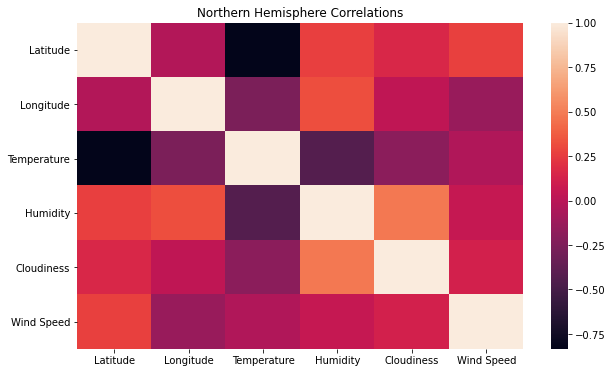

In [18]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs2)

plt.title("Northern Hemisphere Correlations")
plt.show()

In [19]:
corrs3 = df.loc[df.Hemisphere_NS == "Southern"].corr()
corrs3

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
Latitude,1.000000,-0.099240,0.697424,0.170805,0.025693,-0.322127
Longitude,-0.099240,1.000000,-0.222411,0.283890,0.028729,-0.301402
Temperature,0.697424,-0.222411,1.000000,-0.188423,0.089158,-0.188562
Humidity,0.170805,0.283890,-0.188423,1.000000,0.313367,-0.111390
Cloudiness,0.025693,0.028729,0.089158,0.313367,1.000000,-0.116132
Wind Speed,-0.322127,-0.301402,-0.188562,-0.111390,-0.116132,1.000000


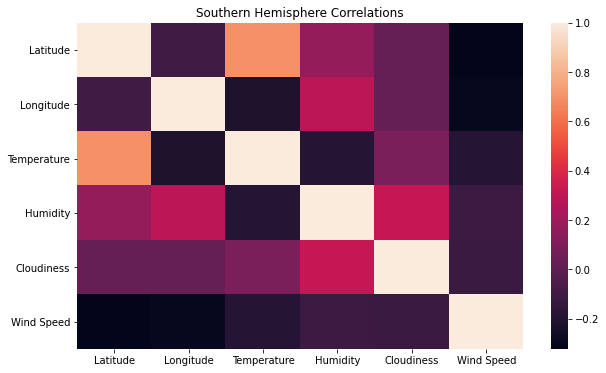

In [20]:
corrs3 = df.loc[df.Hemisphere_NS == "Southern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs3)

plt.title("Southern Hemisphere Correlations")
plt.show()

In [21]:
def do_regression(hemisphere, df, inp_target):
    #filter
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    # get target
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # get equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # plot
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "#BCD8C1")
    plt.title(f"Latitude vs {inp_target}(11/04/2020)", fontsize=18, fontweight="bold", fontname = "Georgia")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="#222E50")
#     plt.annotate(line_eq,(-40, 0),fontsize=15,color="#222E50")

   

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     903.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          2.57e-104
Time:                        18:01:15   Log-Likelihood:                -1621.3
No. Observations:                 399   AIC:                             3247.
Df Residuals:                     397   BIC:                             3255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.0925      1.495     61.586      0.0

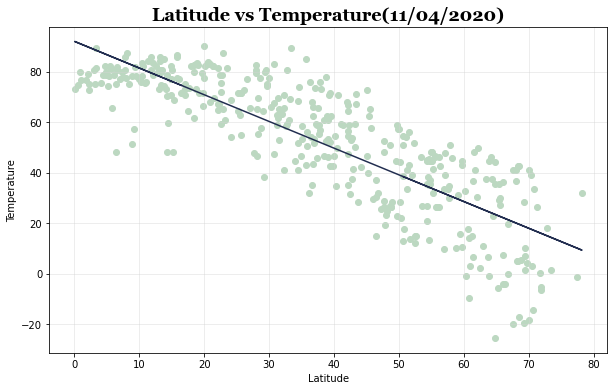

In [22]:
do_regression("Northern", df, "Temperature")
plt.savefig("Images/Latitude_v_Temp_N_Hemisphere.png")
plt.show()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           5.75e-27
Time:                        18:01:15   Log-Likelihood:                -600.38
No. Observations:                 176   AIC:                             1205.
Df Residuals:                     174   BIC:                             1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5751      1.061     77.810      0.0

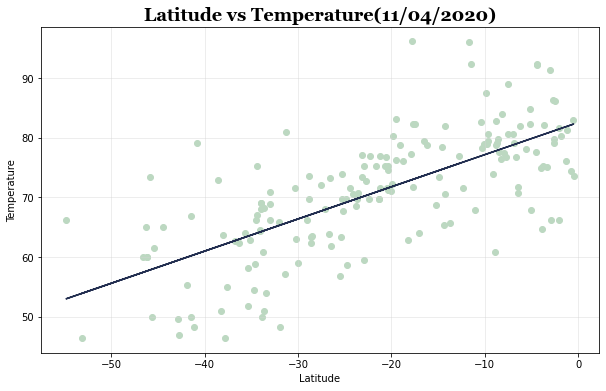

In [23]:
do_regression("Southern", df, "Temperature")
plt.savefig("Images/Latitude_v_Temp_S_Hemisphere.png")
plt.show()

In the southern hempisphere, as latitude increases, temperature increases. The correlation coefficiant is 0.697424; therefore, there is a moderate positive correlation between latitude and temperature for the southern hemisphere.

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     30.43
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           6.26e-08
Time:                        18:01:15   Log-Likelihood:                -1791.4
No. Observations:                 399   AIC:                             3587.
Df Residuals:                     397   BIC:                             3595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9223      2.290     25.731      0.0

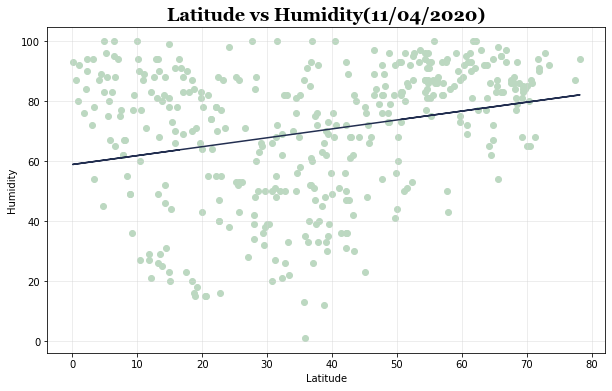

In [24]:
do_regression("Northern", df, "Humidity")
plt.savefig("Images/Latitude_v_Humidity_N_Hemisphere.png")
plt.show()

With a correlation coefficient of is 0.266811, there is a very weak positive relationship between latitude and humidity for the northern hemisphere.

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     5.229
Date:                Sun, 08 Nov 2020   Prob (F-statistic):             0.0234
Time:                        18:01:16   Log-Likelihood:                -755.75
No. Observations:                 176   AIC:                             1515.
Df Residuals:                     174   BIC:                             1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.8896      2.566     29.969      0.0

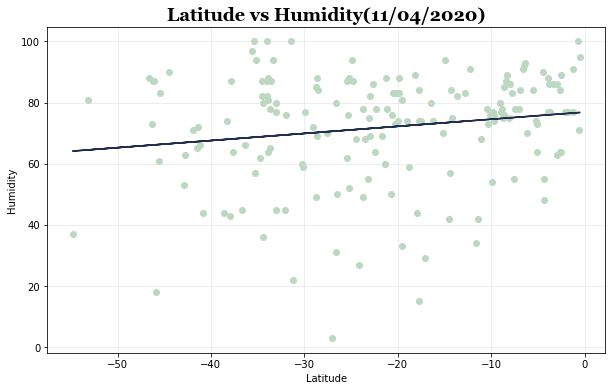

In [25]:
do_regression("Southern", df, "Humidity")
plt.savefig("Images/Latitude_v_Humidity_S_Hemisphere.png")
plt.show()

With a correlation coefficient of is 0.170805, there is a very weak positive relationship between latitude and humidity for the southern hemisphere.

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     10.13
Date:                Sun, 08 Nov 2020   Prob (F-statistic):            0.00157
Time:                        18:01:16   Log-Likelihood:                -2026.2
No. Observations:                 399   AIC:                             4056.
Df Residuals:                     397   BIC:                             4064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8659      4.125      9.181      0.0

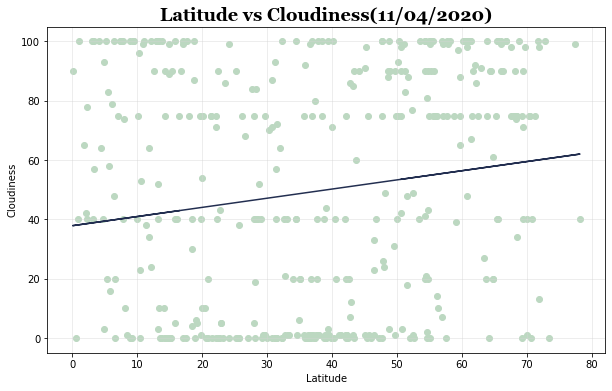

In [26]:
do_regression("Northern", df, "Cloudiness")
plt.savefig("Images/Latitude_v_Cloudiness_N_Hemisphere.png")
plt.show()

With a correlation coefficient of is is 0.157741, there is a very weak positive relationship between latitude in the northern hemisphere and cloudiness.

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1149
Date:                Sun, 08 Nov 2020   Prob (F-statistic):              0.735
Time:                        18:01:16   Log-Likelihood:                -895.86
No. Observations:                 176   AIC:                             1796.
Df Residuals:                     174   BIC:                             1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.1426      5.688      9.871      0.0

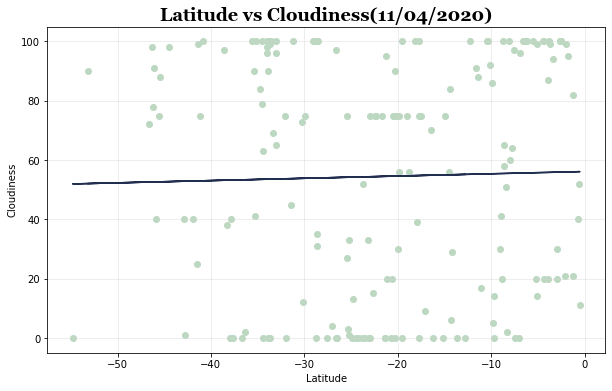

In [27]:
do_regression("Southern", df, "Cloudiness")
plt.savefig("Images/Latitude_v_Cloudiness_S_Hemisphere.png")
plt.show()

With a correlation coefficient of is 0.025693, there is a very weak positive relationship between latitude and cloudiness for the southern hemisphere.

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     32.60
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.22e-08
Time:                        18:01:16   Log-Likelihood:                -1285.6
No. Observations:                 399   AIC:                             2575.
Df Residuals:                     397   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9570      0.645      7.690      0.0

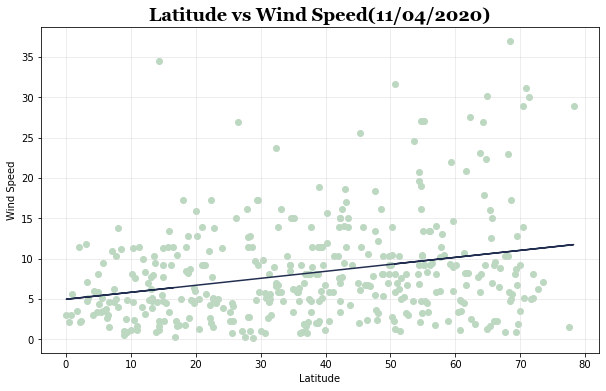

In [28]:
do_regression("Northern", df, "Wind Speed")
plt.savefig("Images/Latitude_v_Wind_Speed_N_Hemisphere.png")
plt.show()

With a correlation coefficient of 0.275471, there is a very weak positive relationship between latitude and wind speed for the northern hemisphere.

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     20.15
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.30e-05
Time:                        18:01:17   Log-Likelihood:                -552.56
No. Observations:                 176   AIC:                             1109.
Df Residuals:                     174   BIC:                             1115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6659      0.809      7.006      0.0

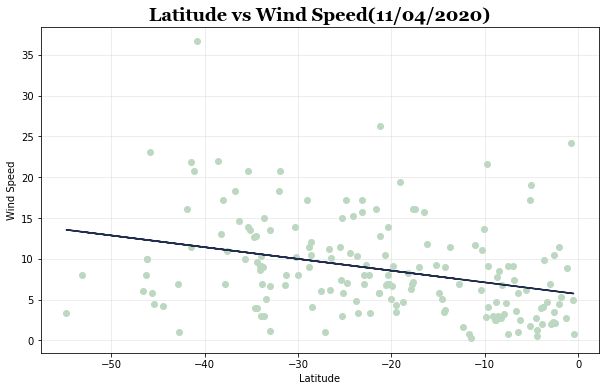

In [29]:
do_regression("Southern", df, "Wind Speed")
plt.savefig("Images/Latitude_v_Wind_Speed_S_Hemisphere.png")
plt.show()

With a correlation coefficient of -0.322127, there is a weak negative relationship between latitude and wind speed for the northern hemisphere.